In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
newmag_84 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_84.txt')

In [5]:
newmag_85 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_85.txt')

In [8]:
newmag_86 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_86.txt')

In [15]:
newmag_87 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_87.txt')

In [17]:
newmag_88 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_88.txt')

In [18]:
newmag_89 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_89.txt')

In [19]:
newmag_91 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_91.txt')

In [20]:
newmag_92 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_92.txt')

In [21]:
newmag_94 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_94.txt')

In [22]:
newmag_95 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_95.txt')

In [23]:
newmag_97 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_97.txt')

In [5]:
newmag_99 = np.loadtxt('/home/yunzheng/mock/abundance_new/data/newmag_99.txt')

In [68]:
print(newmag_84)
print(newmag_85)
print(newmag_86)
print(newmag_87)

[-16.8033454  -16.80334549 -16.80334559 ... -23.62510164 -23.66016366
 -23.71779653]
[-16.59638914 -16.59638924 -16.59638933 ... -23.58891192 -23.6241428
 -23.6820751 ]
[-16.39196477 -16.39196487 -16.39196497 ... -23.55393252 -23.58937244
 -23.64756927]
[-16.18849639 -16.18849649 -16.18849659 ... -23.51983955 -23.55543569
 -23.61391526]


In [25]:
print(newmag_88)
print(newmag_89)
print(newmag_91)
print(newmag_92)
print(newmag_94)
print(newmag_95)
print(newmag_97)
print(newmag_99)

[-15.98660231 -15.98660242 -15.98660252 ... -23.4866363  -23.52238877
 -23.58114349]
[-15.7862735  -15.78627361 -15.78627371 ... -23.45431377 -23.49023152
 -23.54925423]
[-15.39320692 -15.39320704 -15.39320715 ... -23.39257999 -23.42883497
 -23.48837156]
[-15.19837208 -15.19837219 -15.19837231 ... -23.36264436 -23.39905791
 -23.45884601]
[-14.22941673 -14.22941687 -14.22941702 ... -23.26038465 -23.29763116
 -23.35886628]
[-12.89734296 -12.89734318 -12.89734339 ... -23.12015307 -23.15642714
 -23.21613113]
[-12.56231122 -12.56231145 -12.56231168 ... -23.00165844 -23.03707634
 -23.09524871]
[-12.42343613 -12.42343636 -12.4234366  ... -22.90684043 -22.94228826
 -23.00048483]


In [27]:
print(newmag_84.shape)
print(newmag_85.shape)
print(newmag_86.shape)
print(newmag_87.shape)
print(newmag_88.shape)
print(newmag_89.shape)
print(newmag_91.shape)
print(newmag_92.shape)
print(newmag_94.shape)
print(newmag_95.shape)
print(newmag_97.shape)
print(newmag_99.shape)

(26419790,)
(26407747,)
(26393338,)
(26374834,)
(26350859,)
(26325572,)
(26274211,)
(26241654,)
(26181822,)
(26152243,)
(26088686,)
(26029862,)


## load Vpeak data

In [28]:

subhalo = np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_99.txt')

orphan = np.load('/home/yunzheng/mock/orphan_new/final_selection_new/snapshot_99/orphantable_final.npy')

vpeak = np.concatenate((subhalo[:,4], orphan[:,4]))
stag = np.argsort(vpeak)
vpeak = vpeak[stag]

NameError: name 'calc_number_densities' is not defined

In [62]:
vpeak

array([  27.64322853,   29.2680912 ,   29.31170654, ..., 1716.5234375 ,
       1837.66821289, 1841.12133789])

In [31]:
box_size = 600
from AbundanceMatching import *

In [32]:
nd_halos = calc_number_densities(vpeak,600)

In [63]:
nd_halos

array([1.20508620e-01, 1.20508616e-01, 1.20508611e-01, ...,
       1.38888889e-08, 9.25925926e-09, 4.62962963e-09])

Text(0, 0.5, 'Abundance of subhalos')

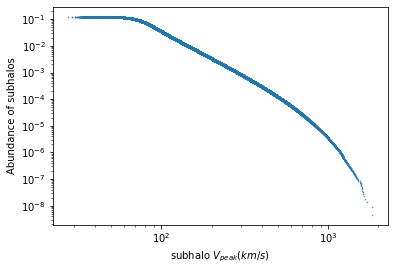

In [36]:
plt.scatter(vpeak,nd_halos,s =0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'subhalo $ V_{peak} (km/s) $')
plt.ylabel(r'Abundance of subhalos')

In [37]:
np.save('/home/yunzheng/mock/abundance_new/data/largedata/vpeak.npy',vpeak)

## Abundance Matching

In [38]:

###luminosity function###
#############################
def luminosity_evolution(M,M_star0,phi_star0,alpha,P,Q,z):
    M_star = M_star0 - Q * (z - 0.1)
    phi_star = phi_star0 * np.power(10,0.4 * P * z)
    y = 0.4 * np.log(10) * phi_star * (np.power(10,(0.4 * (M_star - M)))) ** (1 + alpha) * np.exp(- 10 ** (0.4 * (M_star - M)))
    return y


M_star_Blanton = -20.44
phi_star_Blanton = 0.0149
P_Blanton = 0.18
Q_Blanton = 1.62
alpha_Blanton = -1.05


M_star_Loveday = -20.70
phi_star_Loveday = 0.0094
P_Loveday = 1.8
Q_Loveday = 0.7
alpha_Loveday = -1.23

def omega(z):
    y = (1 + np.exp(-100 * (z - 0.15))) ** (-1)
    return y

def phi_total(M,z):
    y = (1 - omega(z)) * luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z) + omega(z) * luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
    return y

def luminosity_final(M,z):
    if z <= 0.1:
        phi_1 = luminosity_evolution(M,M_star_Blanton,phi_star_Blanton,alpha_Blanton,P_Blanton,Q_Blanton,z)
        return phi_1
    if 0.1 < z < 0.2:
        phi_2 = phi_total(M,z)
        return phi_2
    if z >= 0.2:
        phi_3 = luminosity_evolution(M,M_star_Loveday,phi_star_Loveday,alpha_Loveday,P_Loveday,Q_Loveday,z)
        return phi_3

In [64]:
nstep=1000
lfx0 = np.linspace(-25,-10,nstep)
lfy0 = luminosity_final(lfx0,0.1)
af_test = AbundanceFunction(lfx0,lfy0,(-25,-10))
catalog_test = af_test.match(nd_halos)

In [61]:
catalog_test

array([-12.69358107, -12.6935813 , -12.69358153, ..., -23.07030386,
       -23.10570069, -23.16383038])

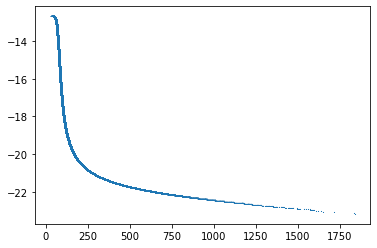

In [46]:
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

### compare with dr7

In [47]:
lfBlanton = np.loadtxt('/home/yunzheng/code/yanglei/yanglei/data/full1/vmax/lfvmax-q2.00a-1.00.dr72full1.dat')
lfB03x=lfBlanton[:,0]
lfB03y=lfBlanton[:,1]

af = AbundanceFunction(lfB03x, lfB03y, (-27, -5))
catalog = af.match(nd_halos)

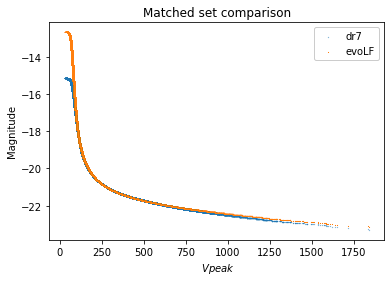

In [49]:
plt.scatter(vpeak,catalog,s = 0.05)
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

plt.title(r'Matched set comparison')
plt.xlabel(r' $Vpeak$ ')
plt.ylabel(r'Magnitude')
plt.legend(('dr7','evoLF'),facecolor='white', framealpha=1)
plt.savefig('/home/yunzheng/mock/abundance_new/picture/Matchcomparision_final.pdf',dpi = 60)

In [60]:
catalog

array([-15.16929239, -15.16929246, -15.16929254, ..., -23.19565508,
       -23.23498981, -23.29965742])

In [65]:
catalog_test

array([-12.68628987, -12.6862901 , -12.68629034, ..., -23.07030111,
       -23.10569808, -23.16382802])

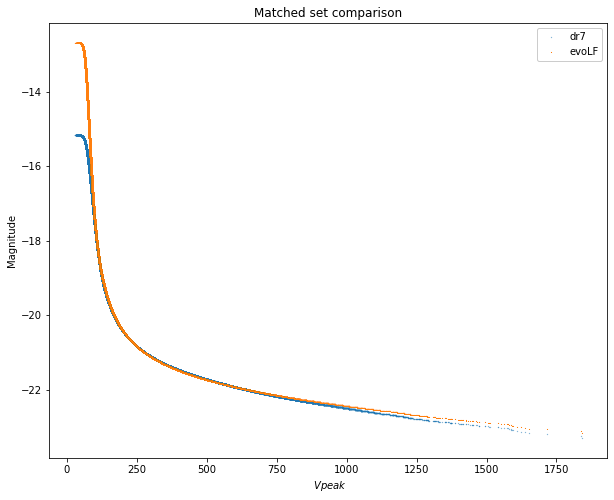

In [67]:
plt.figure(figsize = (10,8))

plt.scatter(vpeak,catalog,s = 0.05)
plt.scatter(vpeak,catalog_test,s=0.05,marker = '*')

plt.title(r'Matched set comparison')
plt.xlabel(r' $Vpeak$ ')
plt.ylabel(r'Magnitude')
plt.legend(('dr7','evoLF'),facecolor='white', framealpha=1)
plt.savefig('/home/yunzheng/mock/abundance_new/picture/Matchcomparision_final.png',format = 'png',dpi = 60)

## scatter

In [50]:
def scatter(M):
    y = 0.8 + 0.4 * np.tanh(M + 20)
    return y

In [6]:
newmag_99

array([-12.42343613, -12.42343636, -12.4234366 , ..., -22.90684043,
       -22.94228826, -23.00048483])

(-17.0, -23.0)

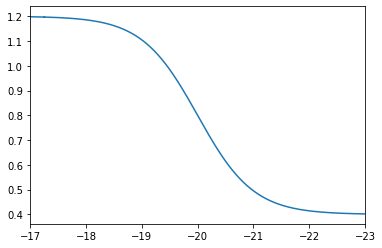

In [8]:
plt.plot(newmag_99,scatter(newmag_99))
plt.xlim(-17,-23)

### truncnorm test

In [10]:
from scipy.stats import truncnorm

In [40]:
mu, sigma = 5, 0.7
lower, upper = mu - 2.5 * sigma, mu + 2.5 * sigma 

X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

M = truncnorm((lower - mu) / sigma, (upper - mu) / sigma)


In [41]:
r

array([3.60212856, 4.40557938, 3.65665406, 3.93245545, 3.79727431,
       3.608921  , 3.68711279, 3.63318559, 3.90732156, 3.78491149,
       4.56303832, 3.67748825, 3.61275915, 3.86328018, 4.00135641,
       3.71659868, 3.76352077, 4.03044598, 3.92348372, 3.69314765,
       4.10035319, 4.00135175, 4.03697219, 3.90657969, 3.67734203,
       3.6097354 , 3.62665579, 3.78437277, 3.89586257, 3.65023203,
       4.25669289, 3.61573472, 3.87445841, 3.64945488, 3.71560085,
       4.71813009, 4.61295799, 3.66069292, 3.83051606, 3.63007218,
       3.76980473, 3.65911452, 3.74010203, 3.71852428, 3.6362894 ,
       3.68207909, 3.6198098 , 3.64962514, 3.80634543, 3.86517262,
       4.21217801, 4.1772383 , 3.92264199, 4.09987162, 3.92251044,
       3.89029728, 3.73428639, 3.67394499, 3.88792922, 3.78998603,
       4.10665176, 3.83811039, 3.77308438, 3.69891755, 4.05228903,
       3.69810142, 4.00283925, 3.87308474, 3.92156204, 3.87398702,
       3.88409157, 3.60313961, 3.76613424, 3.92033256, 3.86602

In [36]:
X

In [37]:
M

In [35]:
r = truncnorm.rvs(lower, upper, size=1000)

(array([0.02046072, 0.03610715, 0.04934644, 0.06619644, 0.08786073,
        0.11795002, 0.14803931, 0.17692503, 0.24312148, 0.27742327,
        0.28825541, 0.35746078, 0.3526465 , 0.40861258, 0.40259472,
        0.38935543, 0.41763937, 0.34783221, 0.32496435, 0.29607863,
        0.26117505, 0.23890898, 0.17933218, 0.14322503, 0.11614467,
        0.09929466, 0.06740001, 0.04814287, 0.03189465, 0.02346965]),
 array([-2.49545308, -2.32928101, -2.16310893, -1.99693686, -1.83076478,
        -1.66459271, -1.49842064, -1.33224856, -1.16607649, -0.99990441,
        -0.83373234, -0.66756026, -0.50138819, -0.33521612, -0.16904404,
        -0.00287197,  0.16330011,  0.32947218,  0.49564425,  0.66181633,
         0.8279884 ,  0.99416048,  1.16033255,  1.32650463,  1.4926767 ,
         1.65884877,  1.82502085,  1.99119292,  2.157365  ,  2.32353707,
         2.48970914]),
 <BarContainer object of 30 artists>)

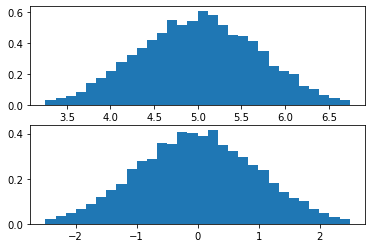

In [42]:

from pylab import *

figure(1)
subplot(2,1,1)
plt.hist(X.rvs(10000), density=True, bins=30)   # 截断正态分布的直方图
subplot(2,1,2)
plt.hist(M.rvs(10000), density=True, bins=30)

In [46]:
lllll = M.rvs(1)

In [47]:
lllll

array([-0.35739693])

In [39]:
truncnorm.rvs?

### adding scatter

In [59]:
def mag_scatter(Mag):
    mu = Mag
    sigma = scatter(Mag)
    lower, upper = mu - 2.5 * sigma, mu + 2.5 * sigma 
    G = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma) 
    return (G.rvs(1))

In [ ]:
mags = []
for mag in newmag_99:
    mags.append(mag_scatter(mag))

In [62]:
newmag_99

array([-12.42343613, -12.42343636, -12.4234366 , ..., -22.90684043,
       -22.94228826, -23.00048483])

In [ ]:
mags